In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
plt.style.use('classic')
from sklearn.preprocessing import Imputer, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('C:/Users/SD480587/python learnings/wine.data')

# Display top of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


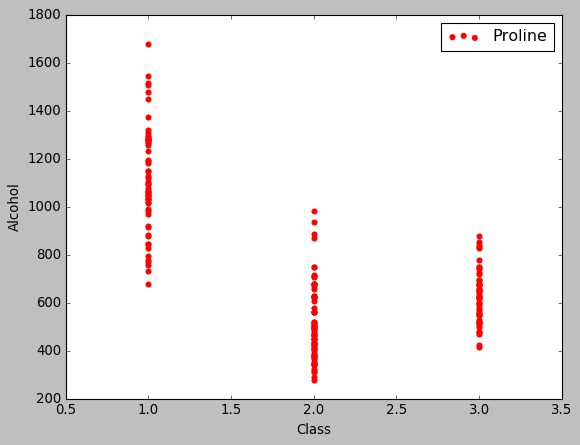

In [3]:
plt.style.use('classic')
#plt.scatter(data.Class,data.Alcohol,marker = 'o',label = 'Alcohol',color = 'red')
#plt.scatter(data.Class,data['Malic acid'],marker = 'x',label = 'Malic acid',color = 'blue')
#plt.scatter(data.Class,data.Ash,marker = 'o',label = 'Ash',color = 'red')
#plt.scatter(data.Class,data['Alcalinity of ash'],marker = 'x',label = 'Alcalinity of ash',color = 'blue')
#plt.scatter(data.Class,data.Magnesium,marker = 'o',label = 'Magnesium',color = 'red')
#plt.scatter(data.Class,data['Total phenols'],marker = 'x',label = 'Total phenols',color = 'blue')
#plt.scatter(data.Class,data.Flavanoids,marker = 'o',label = 'Flavanoids',color = 'red')
#plt.scatter(data.Class,data['Nonflavanoid phenols'],marker = 'x',label = 'Nonflavanoid phenols',color = 'blue')
#plt.scatter(data.Class,data.Proanthocyanins,marker = 'o',label = 'Proanthocyanins',color = 'red')
#plt.scatter(data.Class,data['Color intensity'],marker = 'x',label = 'Color intensity',color = 'blue')
#plt.scatter(data.Class,data.Hue,marker = 'o',label = 'Hue',color = 'red')
#plt.scatter(data.Class,data['OD280/OD315 of diluted wines'],marker = 'x',label = 'OD280/OD315 of diluted wines',color = 'blue')
plt.scatter(data.Class,data.Proline,marker = 'o',label = 'Proline',color = 'red')
plt.xlabel('Class'); plt.ylabel('Alcohol')
plt.legend();

In [4]:
features = data.drop(columns = 'Class')
targets = pd.DataFrame(data['Class'])

In [5]:
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [7]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X = scaler.transform(X)

In [9]:
X_test = scaler.transform(X_test)

In [10]:

# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [11]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [12]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 2.00
Baseline Performance on the test set: MAE = 0.6111


In [13]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [14]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.1911


In [15]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.1675


In [16]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.1204


In [17]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.1425


In [18]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.0667


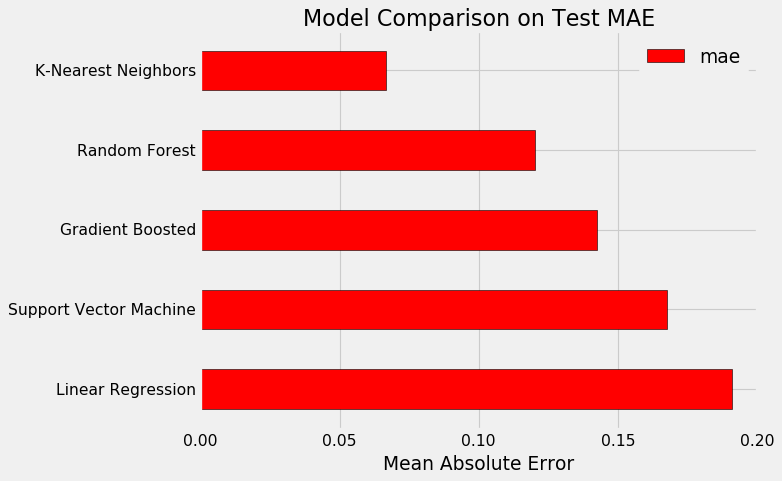

In [19]:

plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [20]:
# Loss function to be optimized
n_neighbors = [2, 5, 8, 11, 14]

weights = ['uniform', 'distance']

algorithm  = ['ball_tree', 'kd_tree', 'brute']

leaf_size = [10,20,30,40,50,60]

p = [1,2]

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_neighbors': n_neighbors,
                       'weights': weights,
                       'algorithm': algorithm,
                       'leaf_size': leaf_size,
                       'p': p}

In [21]:
# Create the model to use for hyperparameter tuning
model = KNeighborsRegressor()

In [22]:
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True)

In [23]:
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_neighbors': [2, 5, 8, 11, 14], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 40, 50, 60], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [24]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,0.00000,0.000000,0.05225,0.022487,uniform,1,2,10,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",-0.032258,-0.032258,-0.048387,-0.032258,-0.036290,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011
15,0.00025,0.000433,0.00050,0.000500,distance,1,2,20,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.032333,-0.034299,-0.046358,-0.033374,-0.036591,0.005682,2,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
23,0.00025,0.000433,0.00050,0.000500,uniform,2,2,40,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",-0.064516,-0.048387,-0.048387,-0.048387,-0.052419,0.006984,3,-0.032258,-0.032258,-0.021505,-0.026882,-0.028226,0.004458
18,0.00025,0.000433,0.00025,0.000433,distance,2,2,40,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",-0.065504,-0.051098,-0.047090,-0.048416,-0.053027,0.007347,4,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
6,0.00025,0.000433,0.00075,0.000433,distance,2,2,60,ball_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",-0.065504,-0.051098,-0.047090,-0.048416,-0.053027,0.007347,4,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [25]:
random_cv.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform')

In [26]:
# Create a range of trees to evaluate
trees_grid = {'leaf_size': [3, 5, 7, 9, 10, 11, 13, 15, 17]}

model = KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform')

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [27]:

# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.3s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'leaf_size': [3, 5, 7, 9, 10, 11, 13, 15, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [28]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.00050,0.000500,0.00025,0.000433,3,{'leaf_size': 3},-0.032258,-0.032258,-0.048387,-0.032258,-0.03629,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011
1,0.00025,0.000433,0.00025,0.000433,5,{'leaf_size': 5},-0.032258,-0.032258,-0.048387,-0.032258,-0.03629,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011
2,0.00025,0.000433,0.00050,0.000500,7,{'leaf_size': 7},-0.032258,-0.032258,-0.048387,-0.032258,-0.03629,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011
3,0.00000,0.000000,0.00025,0.000433,9,{'leaf_size': 9},-0.032258,-0.032258,-0.048387,-0.032258,-0.03629,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011
4,0.00000,0.000000,0.00025,0.000433,10,{'leaf_size': 10},-0.032258,-0.032258,-0.048387,-0.032258,-0.03629,0.006984,1,-0.026882,-0.010753,-0.016129,-0.021505,-0.018817,0.006011


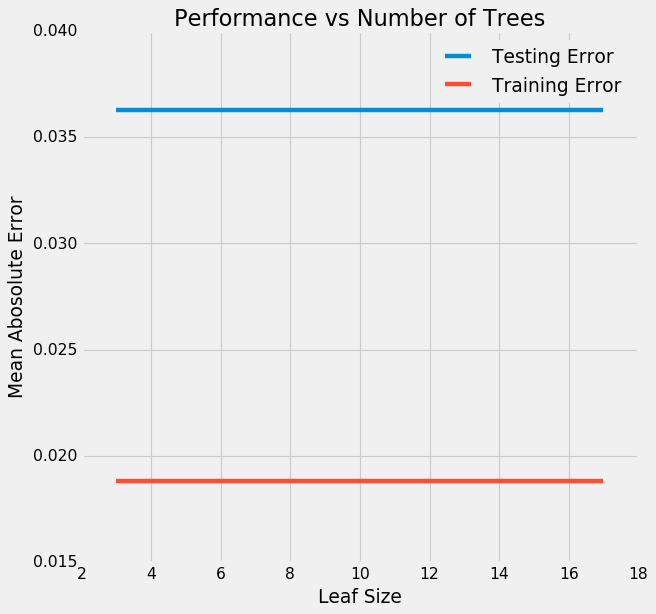

In [29]:
# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_leaf_size'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_leaf_size'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Leaf Size'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [30]:
# Default model
default_model = KNeighborsRegressor(5)

# Select the best model
final_model = grid_search.best_estimator_

final_model

KNeighborsRegressor(algorithm='brute', leaf_size=3, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform')

In [31]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

The slowest run took 11.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1.16 ms ± 1.17 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [32]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

317 µs ± 118 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [33]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.0667.
Final model performance on the test set:   MAE = 0.0556.


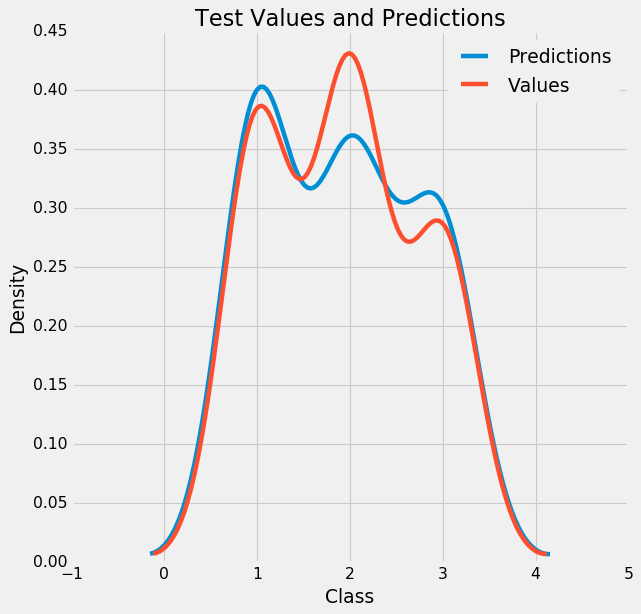

In [34]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Class'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

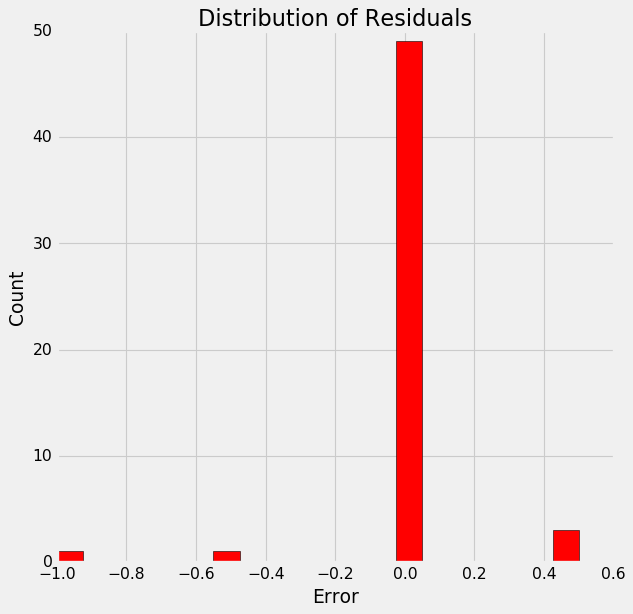

In [35]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');